# Churn Analysis
Perform some exploratory data analysis. Look into the data types, descriptive statistics, and variable distributions.<br>
Verify the hypothesis of price sensitivity being to some extent correlated with churn. 

## dataset
- features of customers in January 2016 as well as the information about whether or not they have churned by March 2016. 
- the prices from 2015 for these customers. 

## analysis
1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Hypothesis investigation

## 1. Import packages

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # pip install seaborn

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

----


## 2. Loading data with Pandas


Load *client_data.csv* and *price_data.csv* into individual dataframes.
(The .csv files should be placed in the same file location at the Notebook.)

In [90]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

Look at the first 3 rows of both dataframes to see what the data looks like. 

In [29]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


With the client data, we have a mix of numeric and categorical data, which should be transformed before modeling later. 

In [7]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


With the price data, they are purely numeric data, but there are a lot of zeros. 

----

## 3. Descriptive statistics of data

### Data types
first, understand the data that we're dealing with along with the data types of each column. 

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


All *date time* related columns (e.g., date_activ, date_end,date_renewal) are in object formate, not currently in date time formate. We will need to convert these later.

### Statistics

Now, let's look at some statistics about the datasets using *describe()* to check normalization.

In [92]:
client_df.describe() 

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


The describe method gives us a lot of information about the client data. 
The key point to take away from this is that we have **highly skewed data**, as exhibited by **the percentile values**.
25%: 5.68, 50%: 1.41, 75%: 4.08

In [30]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Overall the price data looks good.

----

## 4. Data Visualization
In Python, two of the most popular packages for visualization are **matplotlib** and **seaborn**. 
Now, let's dive a bit deeper into the dataframe.

In [93]:
def plot_stacked_bars(client_df, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = client_df.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )   

###  4.1 Churn
Fist, let's work on the 'client_df'.<br>
purpose: the percentage of churn - descriptive & stacked bar

In [94]:
# create a 'churn' dataframe with 'id' and 'churn' columns
churn = client_df[['id', 'churn']] 

In [95]:
churn.head(5) # check 5 rows

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0
3,bba03439a292a1e166f80264c16191cb,0
4,149d57cf92fc41cf94415803a877cb4b,0


In [96]:
# rename the columns in the newly created 'churn' df from 'id'&'churn' to 'Companies'&'churn'
churn.columns = ['Companies', 'churn'] 

churn.head(5) # check 5 rows

,Companies,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0
3,bba03439a292a1e166f80264c16191cb,0
4,149d57cf92fc41cf94415803a877cb4b,0


In [97]:
# group the data in the 'churn' df by the 'churn' column using '.groupby()', 
# calculate the count of companies in each churn category
# create a new df 'churn_total'. 
churn_total = churn.groupby(churn['churn']).count()

churn_total # check the new df

,Companies
churn,
0,13187
1,1419


In [98]:
# calculate the churn percentage by dividing each count in 'churn_total' by the sum of all counts
churn_percentage = churn_total / churn_total.sum() * 100

churn_percentage # show the churn percentage for each category.It helps to understand the distribution

,Companies
churn,
0,90.284814
1,9.715186


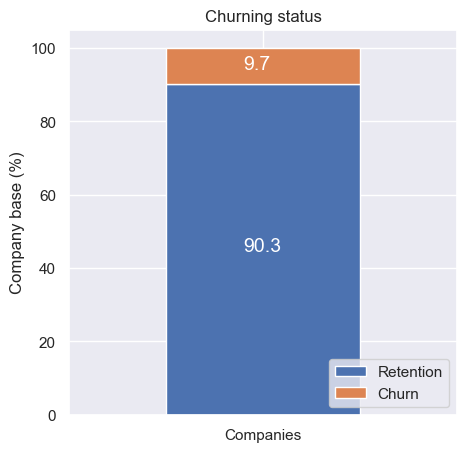

In [99]:
# create a stacked bar chart using 'plot_stacked_bars()' function
plot_stacked_bars(churn_percentage.transpose(), # '.transpose()' converts the rows into columns.It allows the stacked bar chart to plot each category side by side as stacked bars.
                  "Churning status", (5, 5),    # x-axis label
                  legend_="lower right")        # legend location

Conclusion: about 10% of the total customers have churned.

### 4.2 Sales channel
Second, we move on to work on 'client_df'

In [100]:
# we only need three columns: id, channel_sales, churn
# select these 3 columns, and create a new df 'channel'.
channel = client_df[['id','channel_sales','churn']] 

channel.head(5)

,id,channel_sales,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,0


In [101]:
# step 1: grouping and counting.
# group by 'channel_sales' and 'churn' columns.
# calculate the count of 'id' for each group.
channel = channel.groupby([channel['channel_sales'],channel['churn']])['id'].count() 
         # the count() function is applied to count the number of occurrences of each combination of 'channel_sales' and 'churn' in the 'id' column


In [102]:
# step 2: unstacking and filling Na.
channel = channel.unstack(level=1).fillna(0) 
# 'unstack()' is used to pivot the 'churn' level of the multi-index series to columns, e.g., if the original 'churn' column had two values: 0 & 1, the new df will contrain two columns: one for 'churn'=0 and another for 1. 
# when using unstack(),some combinations of 'channel_sales' and 'churn' might not exist in the original data, resulting in Na.

channel

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


In [103]:
# step 3: calculating percentage
# calculate the sum of values in each row (along axis=1)
channel_sum = channel.sum(axis=1) 

# axis=0 (rows) e.g.,calculating the sum of elements in each row, you'll get the sum for each row separately.
# axis=1 (columns) e.g.,calculating the sum of elements in each column, you'll get the sum for each column separately.

channel_sum # check results

channel_sales
MISSING                             3725.0
epumfxlbckeskwekxbiuasklxalciiuu       3.0
ewpakwlliwisiwduibdlfmalxowmwpci     893.0
fixdbufsefwooaasfcxdxadsiekoceaa       2.0
foosdfpfkusacimwkcsosbicdxkicaua    6754.0
lmkebamcaaclubfxadlmueccxoimlema    1843.0
sddiedcslfslkckwlfkdpoeeailfpeds      11.0
usilxuppasemubllopkaafesmlibmsdf    1375.0
dtype: float64

In [112]:
## divide each element in the df by the corresponding sum of its row elements (along axis=0)
channel_churn = channel.div(channel_sum,axis=0) * 100  
channel_churn

churn,0,1
channel_sales,,
MISSING,92.402685,7.597315
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364


In [113]:
# step 4: Sorting by Churn Percentage in Descending order
channel_churn = channel_churn.sort_values(by=[1], ascending=False)
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


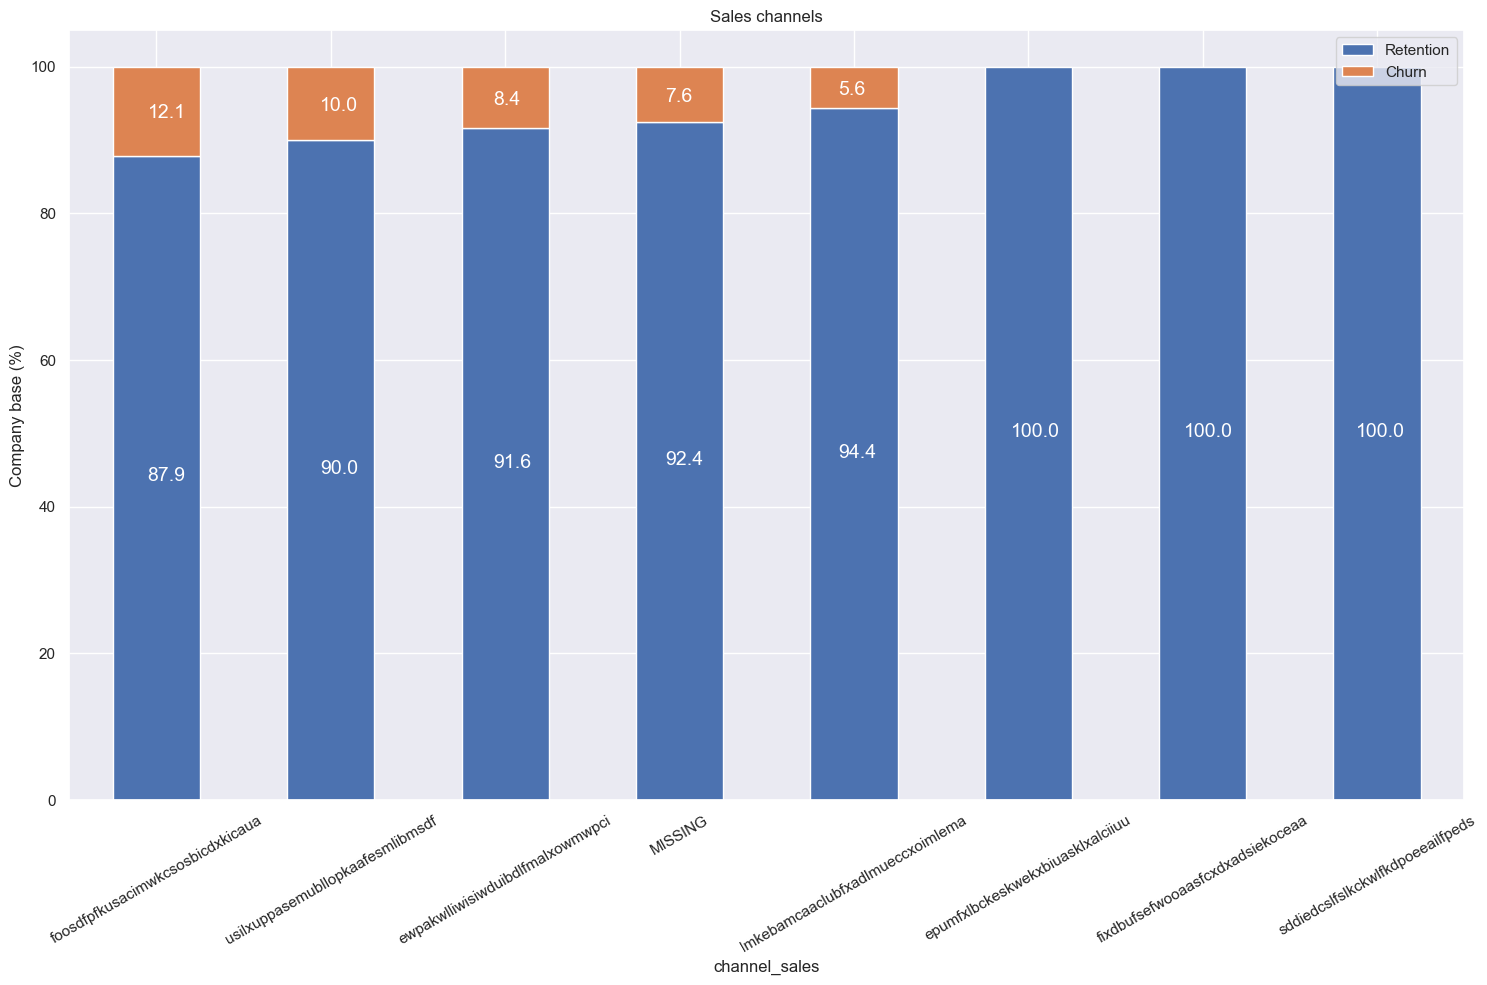

In [118]:
# step 5: stacked bars
plot_stacked_bars(channel_churn,'Sales channels',rot_=30)

# 'rot_=30' specifies the rotation angle for the x-axis labels

Conclusion: the churning customers are distributed over 5 different values for 'channel_sales'. <br>
Moreover, the value of 'missing' has a churn rate of 7.6%. 'missing' indicates missing values and was added by the team when they were cleaning the dataset. 

### 4.3 Consumption
Third, let's see the distribution of the consumption in the last year and month. <br>
Visualize their distribution using histograms.

In [106]:
# select 7 columns
consumption = client_df[['id', 
                         'cons_12m', 
                         'cons_gas_12m', 
                         'cons_last_month', 
                         'imp_cons', 
                         'has_gas', 
                         'churn']]

consumption.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


In [107]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained companies.

    Parameters:
        client_df (pandas DataFrame): The DataFrame containing the data.
        column (str): The name of the column for which the distribution will be plotted.
        ax (matplotlib axes object): The axes object where the histogram will be drawn.
        bins_ (int, optional): The number of bins to use in the histogram. Default is 50.
    """
    
    # Create a temporal dataframe with the data to be plot.
    # a new df 'temp' contains two columns: retention & churn.
    temp = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"]==0][column], # retained companies
        "Churn":dataframe[dataframe["churn"]==1][column] # churned companies
    })

    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    
    # Set X-axis label
    ax.set_xlabel(column)
    # Set the x-axis style to plain style
    ax.ticklabel_format(style='plain', axis='x')

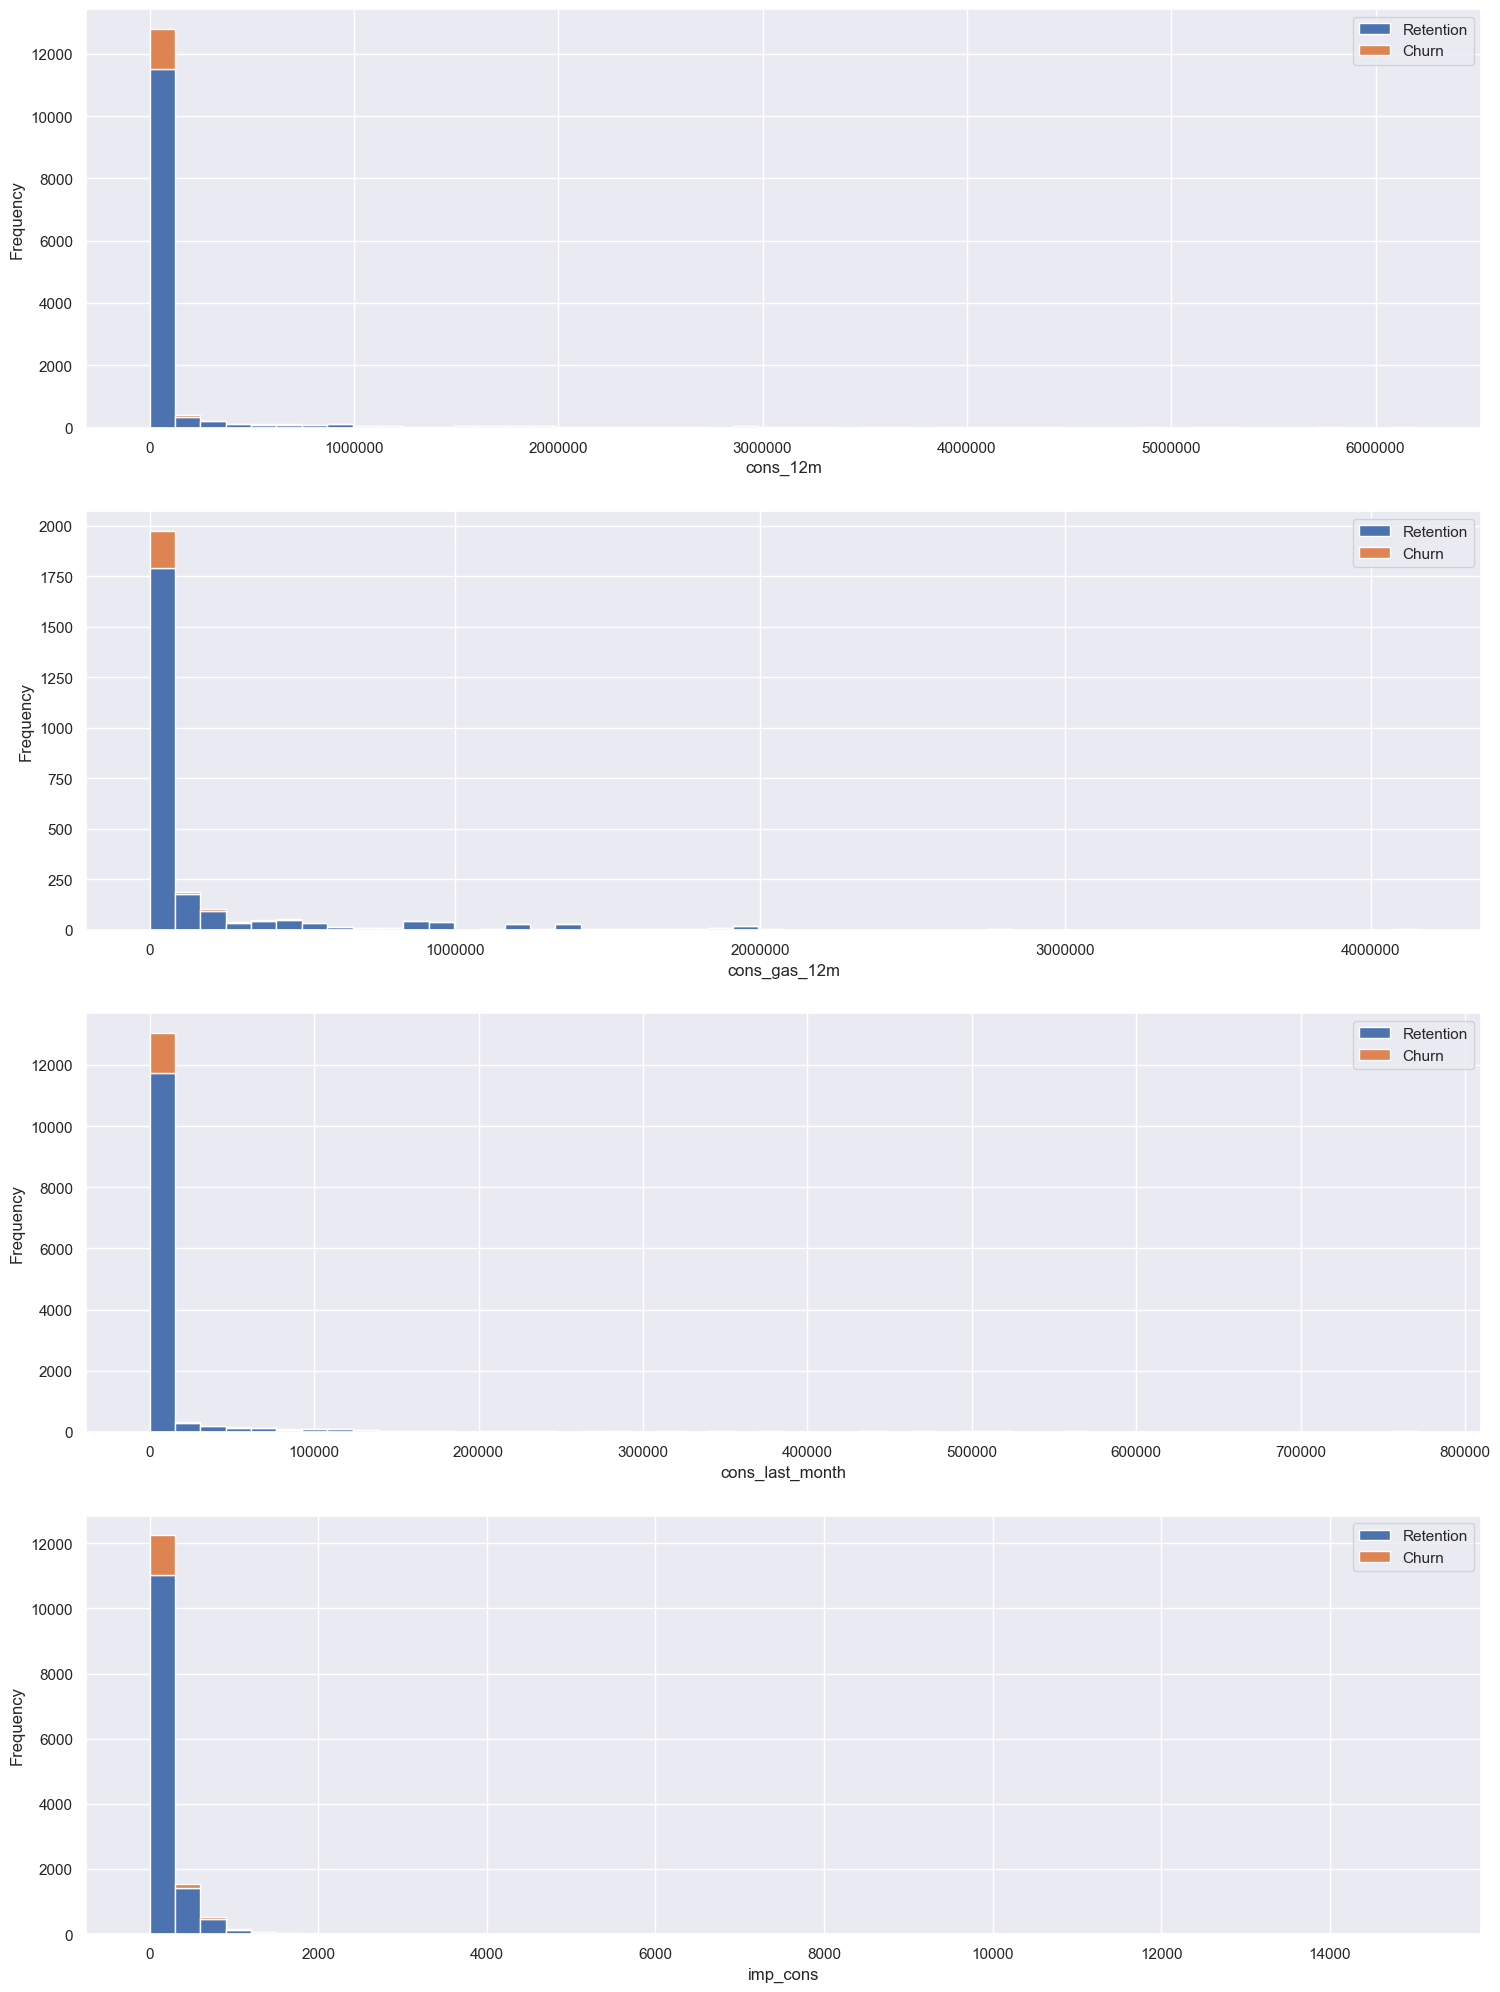

In [108]:
# create a figure with multiple subplots in a grid layout.
# create 4 rows of subplots
# set the size of the entire figure in inches. width=18, height=25

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))
# 'fig'= the entire figure
# 'axs'= a NumPy array

plot_distribution(consumption, 'cons_12m', axs[0]) # the 0th
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

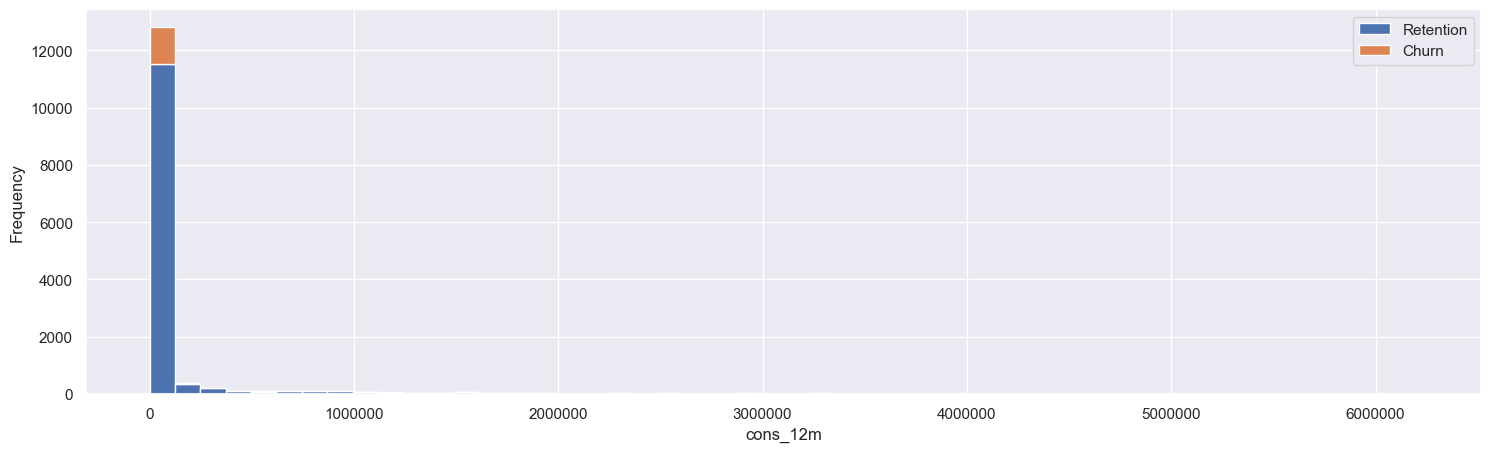

In [109]:
# if create only 1 subplot: 
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs) #

Conclusion: the consumption data is highly positively skewed.

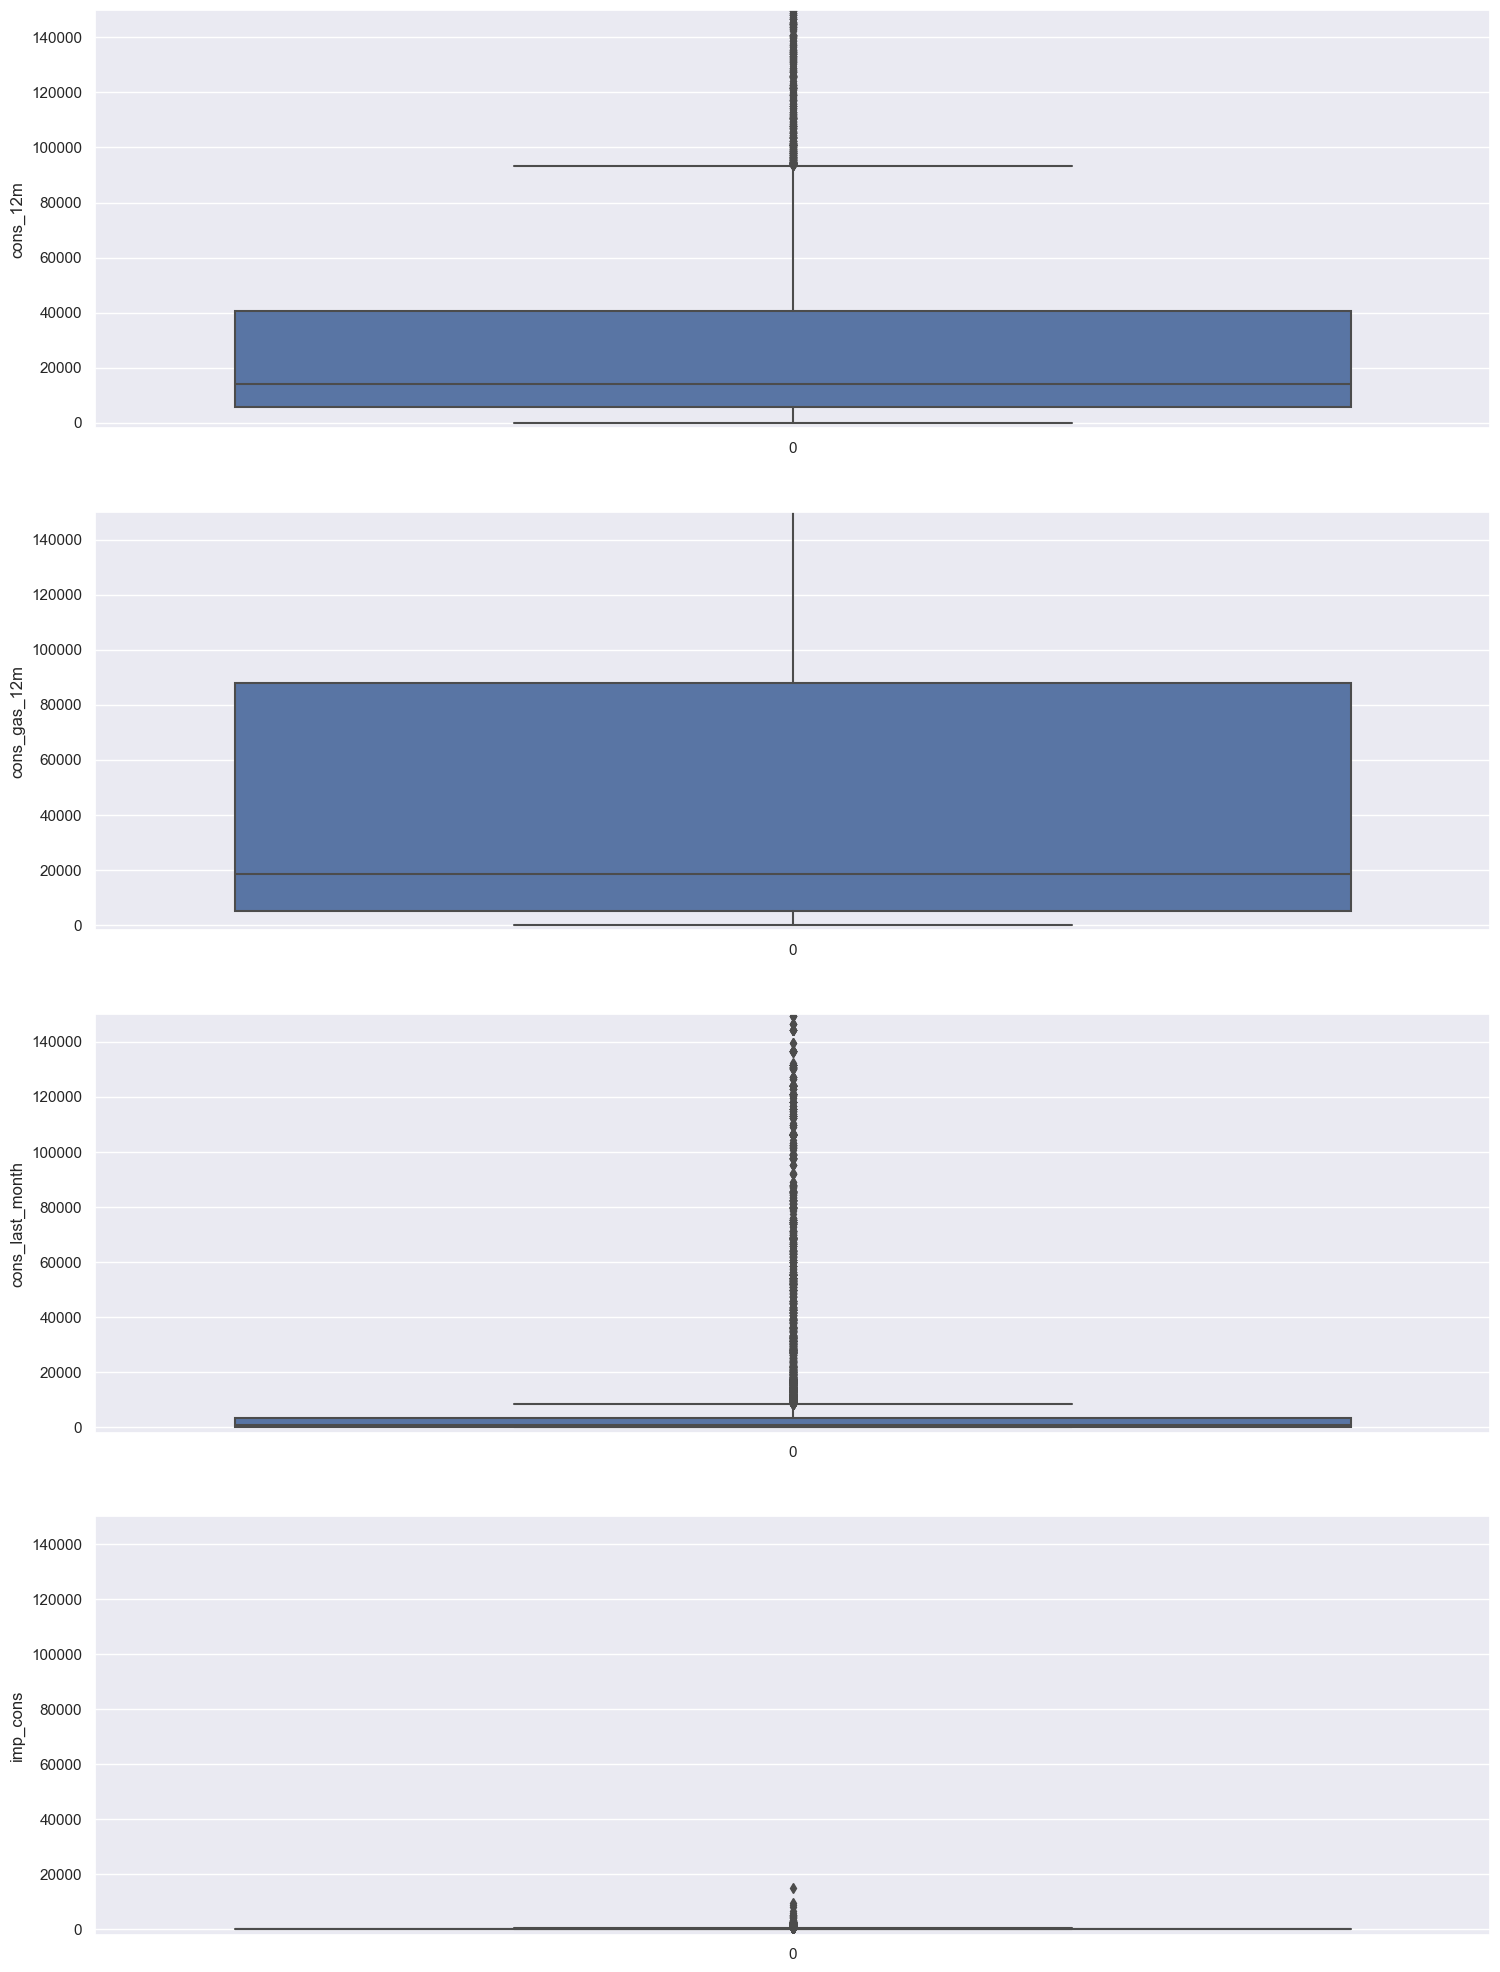

In [138]:
# to reveal outliers, create boxplots

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# Plot horizontal boxplot using 'sns.boxplot()' in the Seaborn library.
sns.boxplot(y=consumption["cons_12m"], ax=axs[0])  # Nr.0
sns.boxplot(y=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(y=consumption["cons_last_month"], ax=axs[2])  # Nr.2
sns.boxplot(y=consumption["imp_cons"], ax=axs[3])

# Remove scientific notation and set y-axis limits
for ax in axs:
    ax.ticklabel_format(style='plain', axis='y')  # Adjusted to 'y' for the y-axis
    ax.set_xticklabels([f"{label:.0f}" for label in ax.get_xticks()]) 
    ax.set_ylim(-2000, 150000)

plt.show()


### 4.4 Forecast

In [221]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [220]:
# select columns
forecast = client_df[
    ["id","forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_peak","forecast_price_energy_off_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

In [222]:
forecast.head(5)

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_peak,forecast_price_energy_off_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.098142,0.114481,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.000000,0.145711,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.087899,0.165794,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.000000,0.146694,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.100015,0.116900,40.606701,0


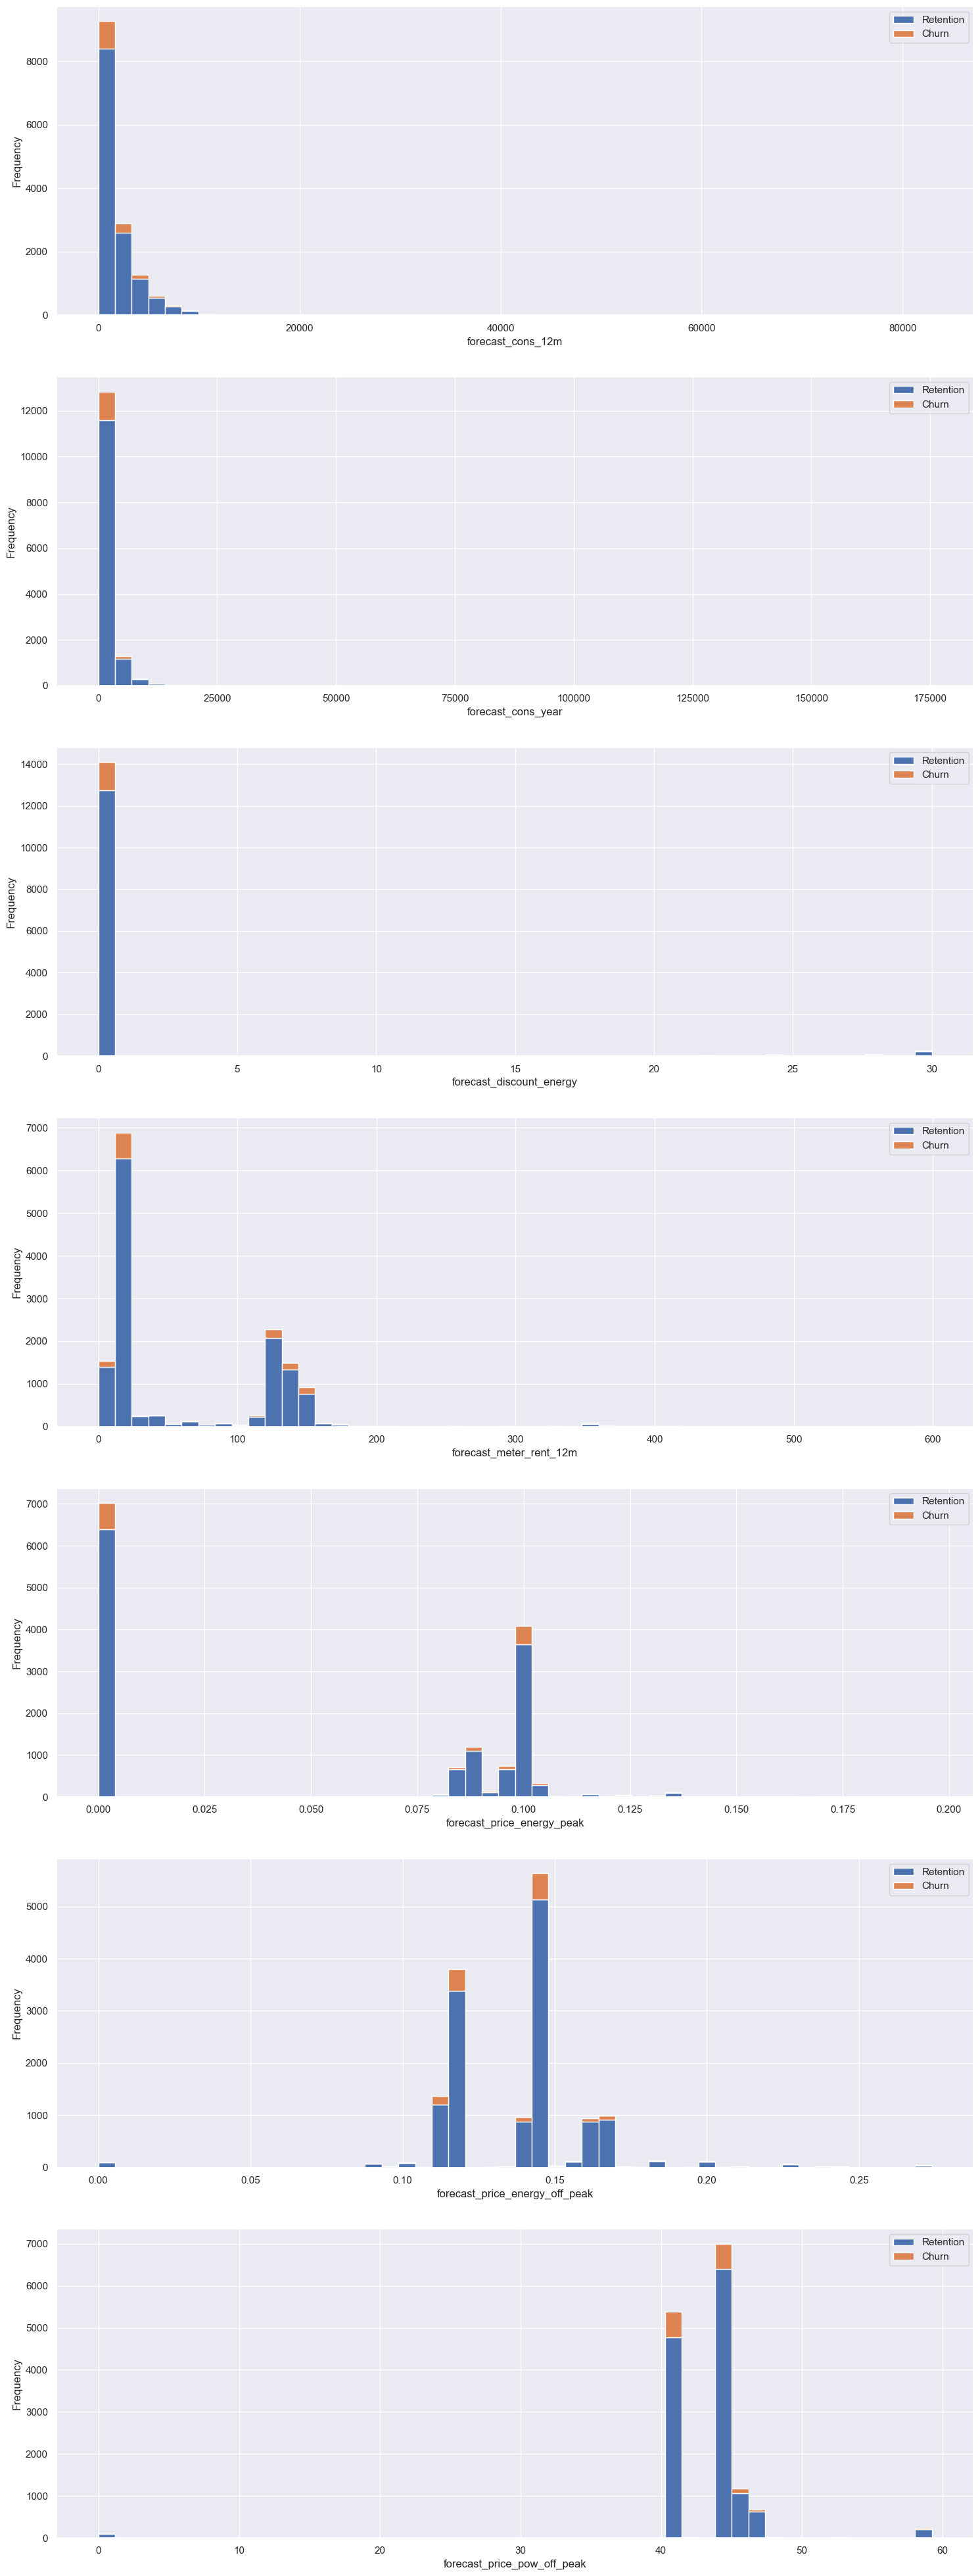

In [225]:
# histograms
# 7 subplots
fig,axs = plt.subplots(nrows=7, figsize=(18,50))

plot_distribution(forecast,"forecast_cons_12m", axs[0])
plot_distribution(forecast,"forecast_cons_year",axs[1])
plot_distribution(forecast,"forecast_discount_energy",axs[2])
plot_distribution(forecast,"forecast_meter_rent_12m", axs[3])
plot_distribution(forecast,"forecast_price_energy_peak", axs[4])
plot_distribution(forecast,"forecast_price_energy_off_peak",axs[5])
plot_distribution(forecast,"forecast_price_pow_off_peak",axs[6])


Conclusion: we found that a lot of variables are positively skewed, creating a very long tail for the higher values. 

### 4.5 Contract type

In [227]:
contract_type = client_df[
    ["id",
     "has_gas",
     "churn"        
    ]
]

contract_type.head(5)

,id,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,f,0
2,764c75f661154dac3a6c254cd082ea7d,f,0
3,bba03439a292a1e166f80264c16191cb,f,0
4,149d57cf92fc41cf94415803a877cb4b,f,0


In [230]:
contract=contract_type.groupby([contract_type["churn"], 
                                contract_type["has_gas"]])["id"].count().unstack(level=0)

contract

churn,0,1
has_gas,,
f,10753,1202
t,2434,217


In [239]:
# percentage
contract_percentage = (contract.div(contract.sum(axis=1),axis=0)*100)
contract_percentage

churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


In [240]:
# sort
contract_percentage = contract_percentage.sort_values(by=[1],ascending=False)
contract_percentage

churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


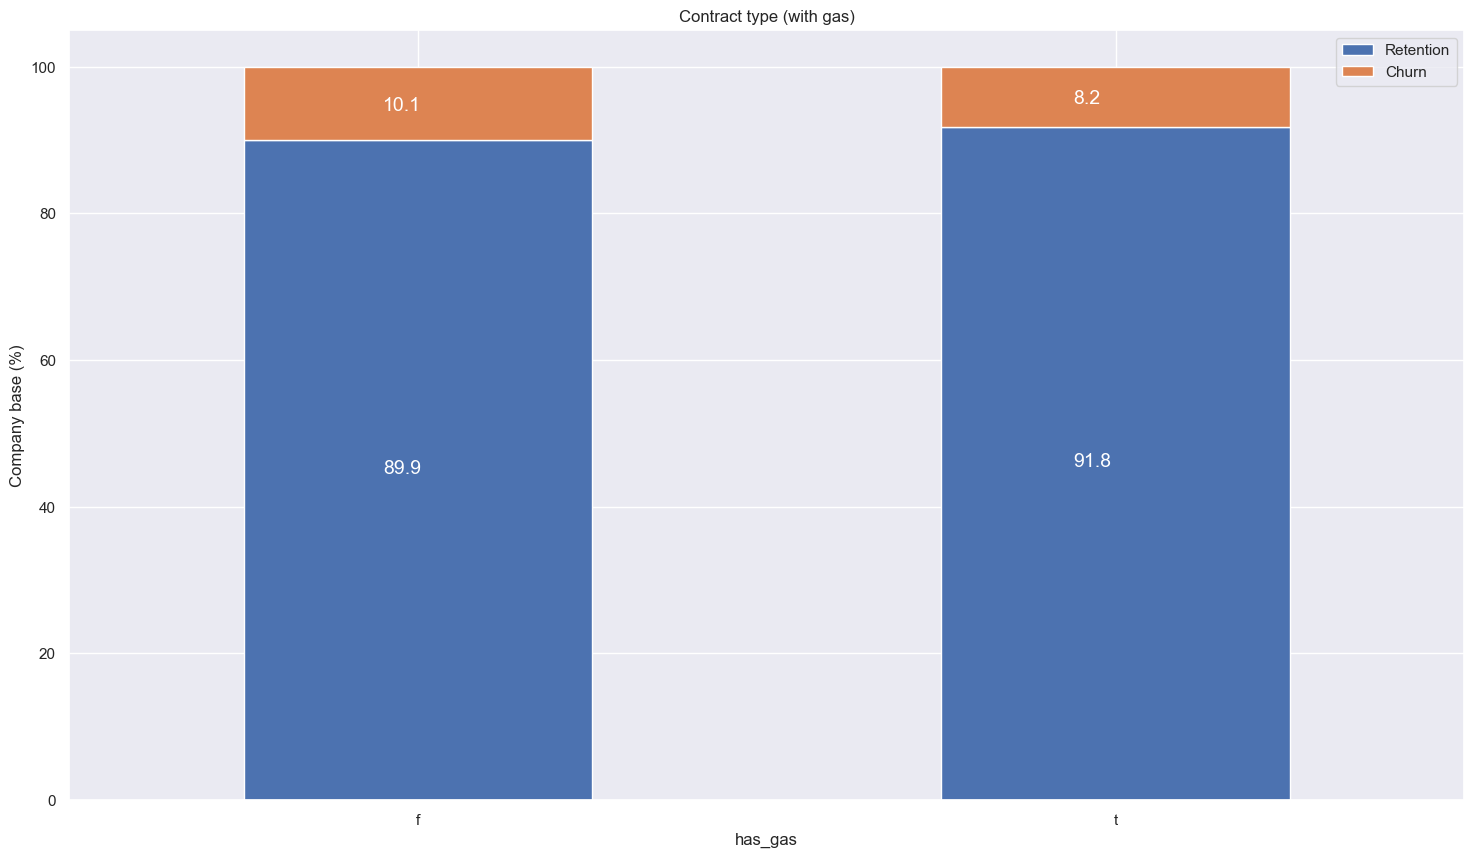

In [242]:
# stacked bars
plot_stacked_bars(contract_percentage,"Contract type (with gas)")


### 4.6 Margins

In [131]:
margin = client_df[
    ["id",
     "margin_gross_pow_ele",
     "margin_net_pow_ele",
     "net_margin"
    ]
]
margin.head(5)

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89
2,764c75f661154dac3a6c254cd082ea7d,28.60,28.60,6.60
3,bba03439a292a1e166f80264c16191cb,30.22,30.22,25.46
4,149d57cf92fc41cf94415803a877cb4b,44.91,44.91,47.98


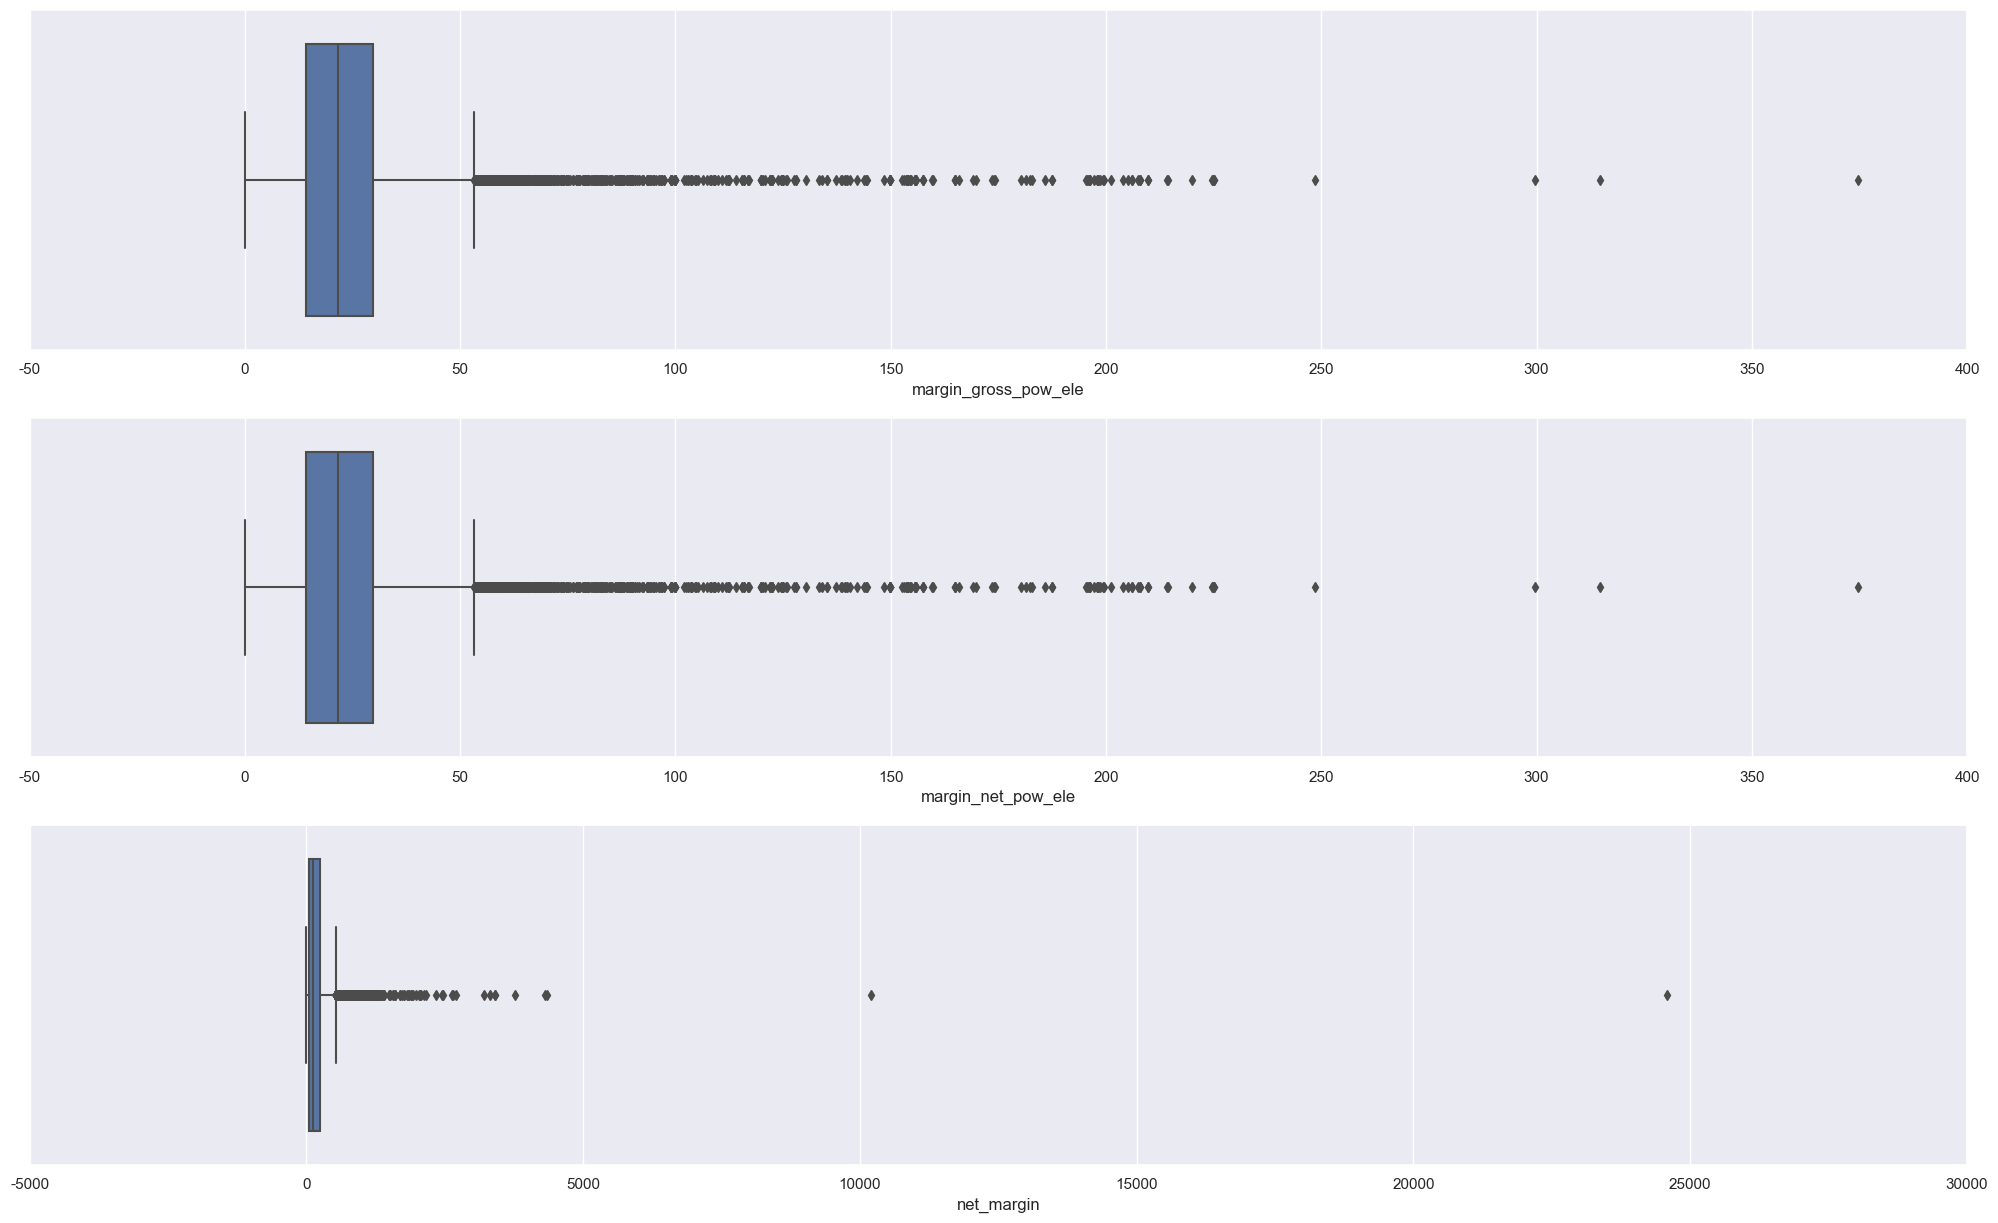

In [132]:
fig,axs = plt.subplots(nrows=3, figsize=(25,15))

# histogram
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(x=margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(x=margin["net_margin"],ax=axs[2])

# Remove scientific notation from x-axis tick labels
for ax in axs: 
    ax.set_xticks(ax.get_xticks()) # This line is important to trigger the formatter change
    ax.set_xticklabels([f"{label:.0f}" for label in ax.get_xticks()])  # Format labels as integers
    
plt.show()


### 4.7 Subscribed power

In [7]:
power = client_df[
    ["id",
     "pow_max",
     "churn"   
    ]
]
power.head(5)

,id,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,13.856,0
3,bba03439a292a1e166f80264c16191cb,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,19.800,0


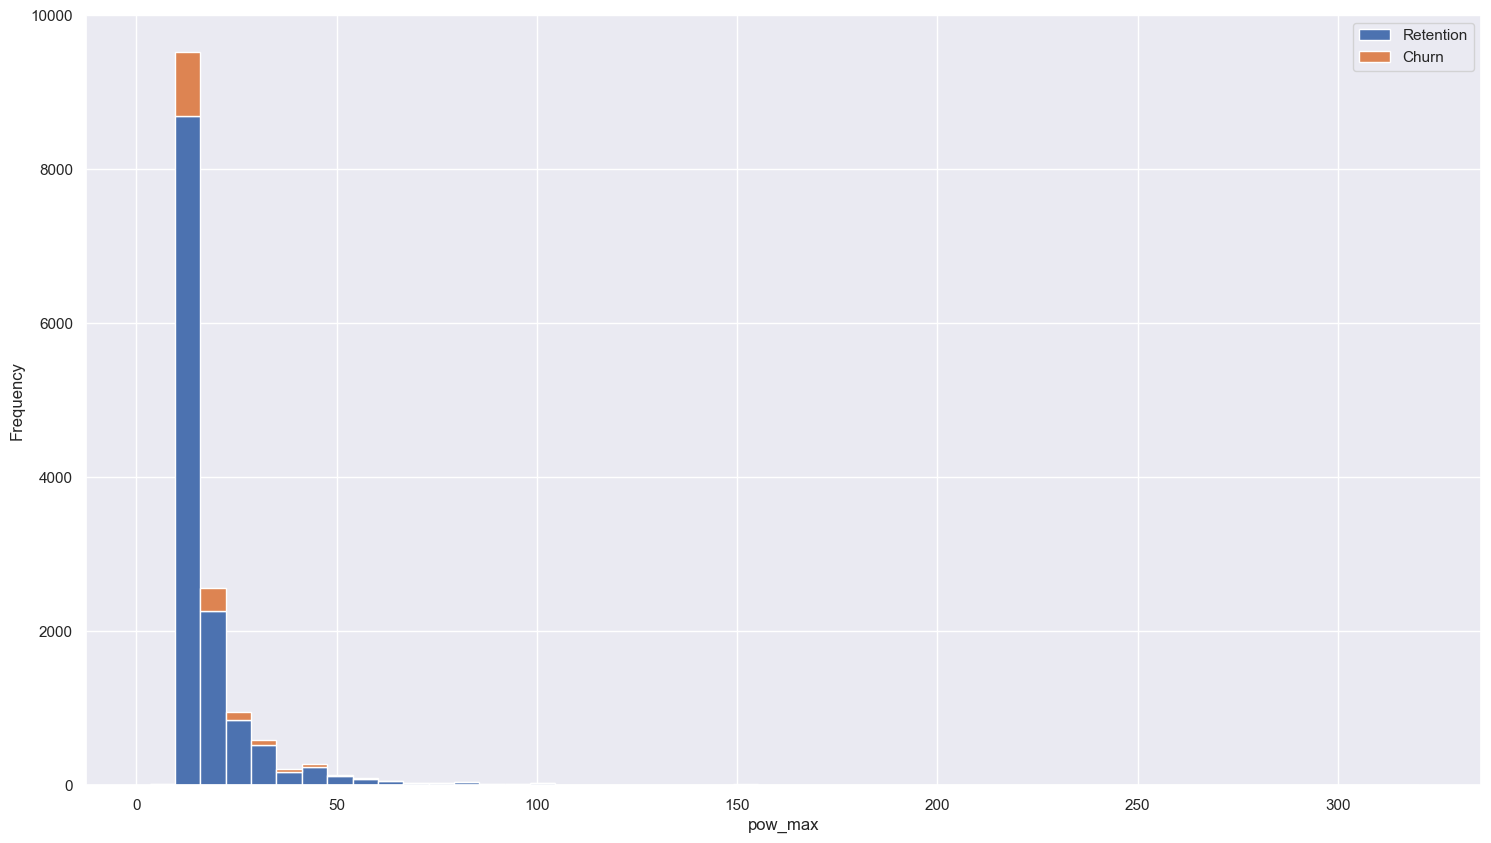

In [257]:
# histogram
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### 4.8 Other columns

In [8]:
others = client_df[
    ["id",
     "nb_prod_act", 
     "num_years_antig", 
     "origin_up",
     "churn"
    ]
]
others.head(5)

,id,nb_prod_act,num_years_antig,origin_up,churn
0,24011ae4ebbe3035111d65fa7c15bc57,2,3,lxidpiddsbxsbosboudacockeimpuepw,1
1,d29c2c54acc38ff3c0614d0a653813dd,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
2,764c75f661154dac3a6c254cd082ea7d,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
3,bba03439a292a1e166f80264c16191cb,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
4,149d57cf92fc41cf94415803a877cb4b,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,0


In [9]:
# group by 'nb_prod_act' and 'churn'
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products.head(5)

churn,0,1
nb_prod_act,,
1,10290.0,1141.0
2,2237.0,208.0
3,471.0,52.0
4,135.0,15.0
5,28.0,3.0


In [11]:
# percentage_number of products_by churn
products_percentage=(products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)
products_percentage.head(5)

churn,0,1
nb_prod_act,,
4,90.000000,10.000000
1,90.018371,9.981629
3,90.057361,9.942639
5,90.322581,9.677419
2,91.492843,8.507157


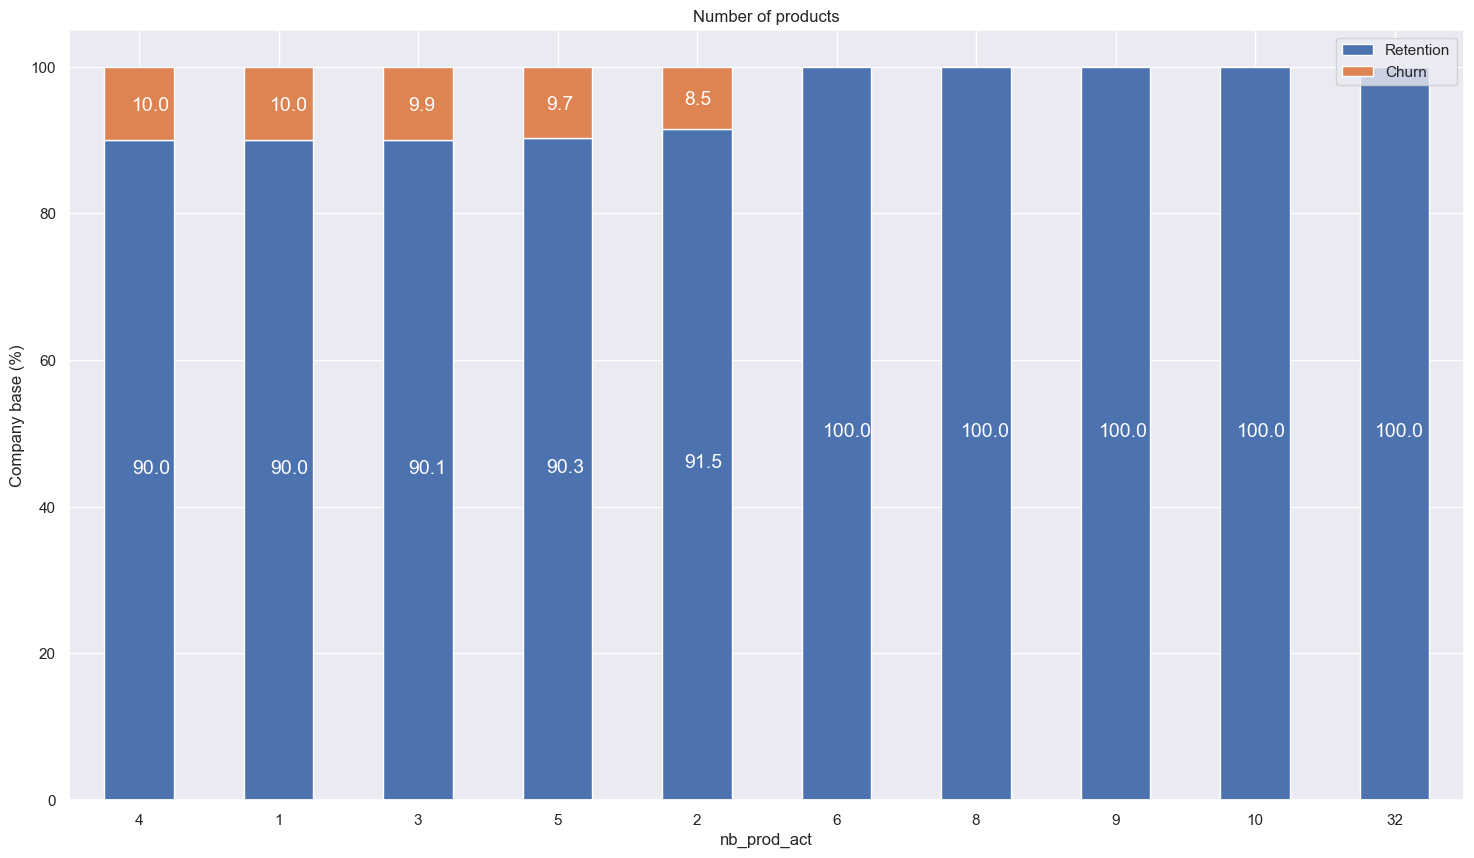

In [14]:
# stacked plot_ number of products_by churn
plot_stacked_bars(products_percentage,"Number of products")

In [19]:
# years
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_percentage = (years_antig.div(years_antig.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
years_percentage.head(5)

churn,0,1
num_years_antig,,
2,72.727273,27.272727
3,86.477600,13.522400
4,88.146660,11.853340
12,90.000000,10.000000
5,91.368148,8.631852


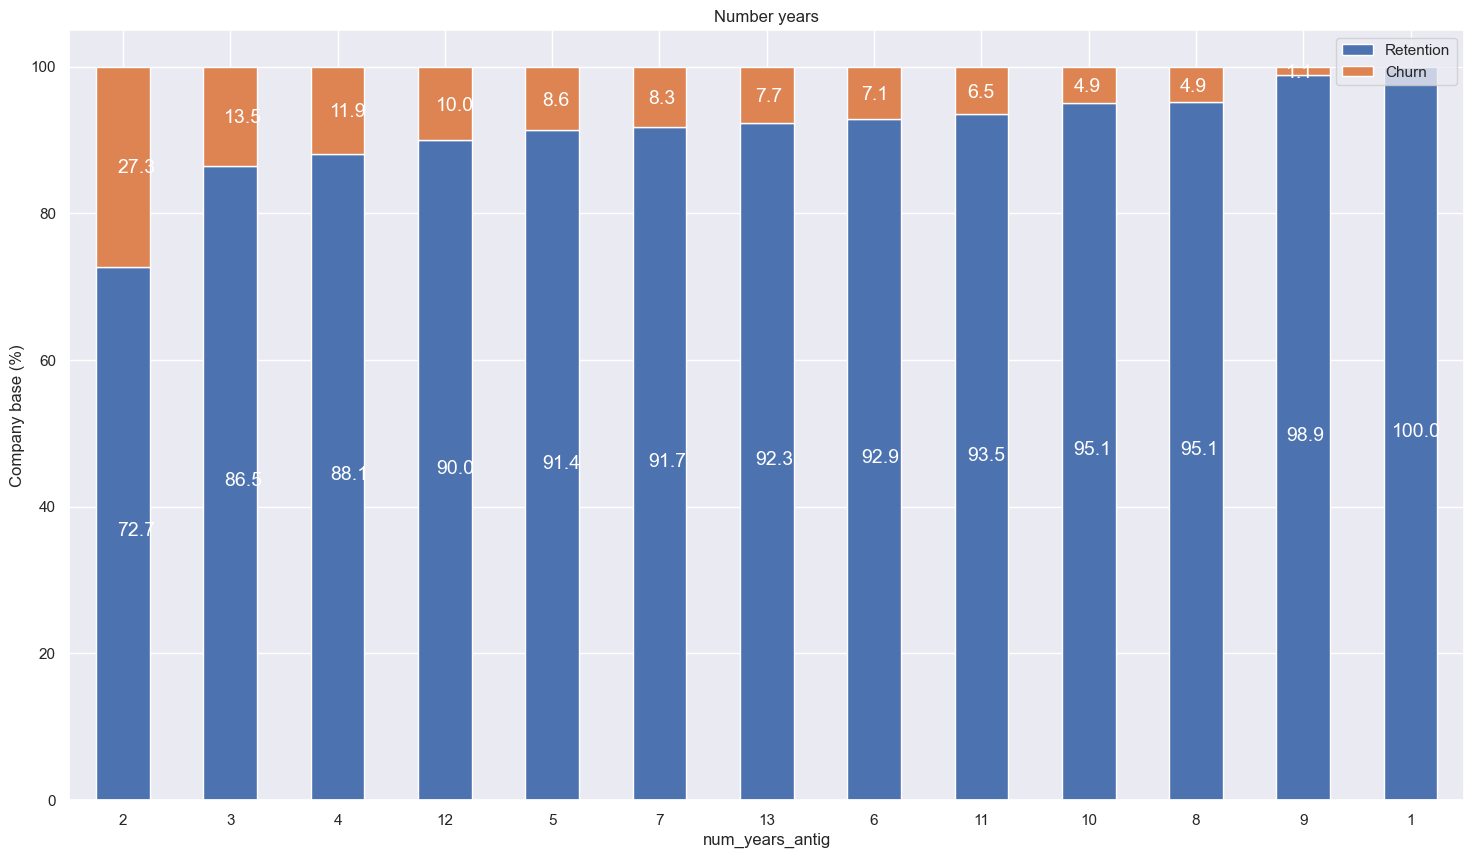

In [20]:
# stacked plots years by churn
plot_stacked_bars(years_percentage,"Number years")

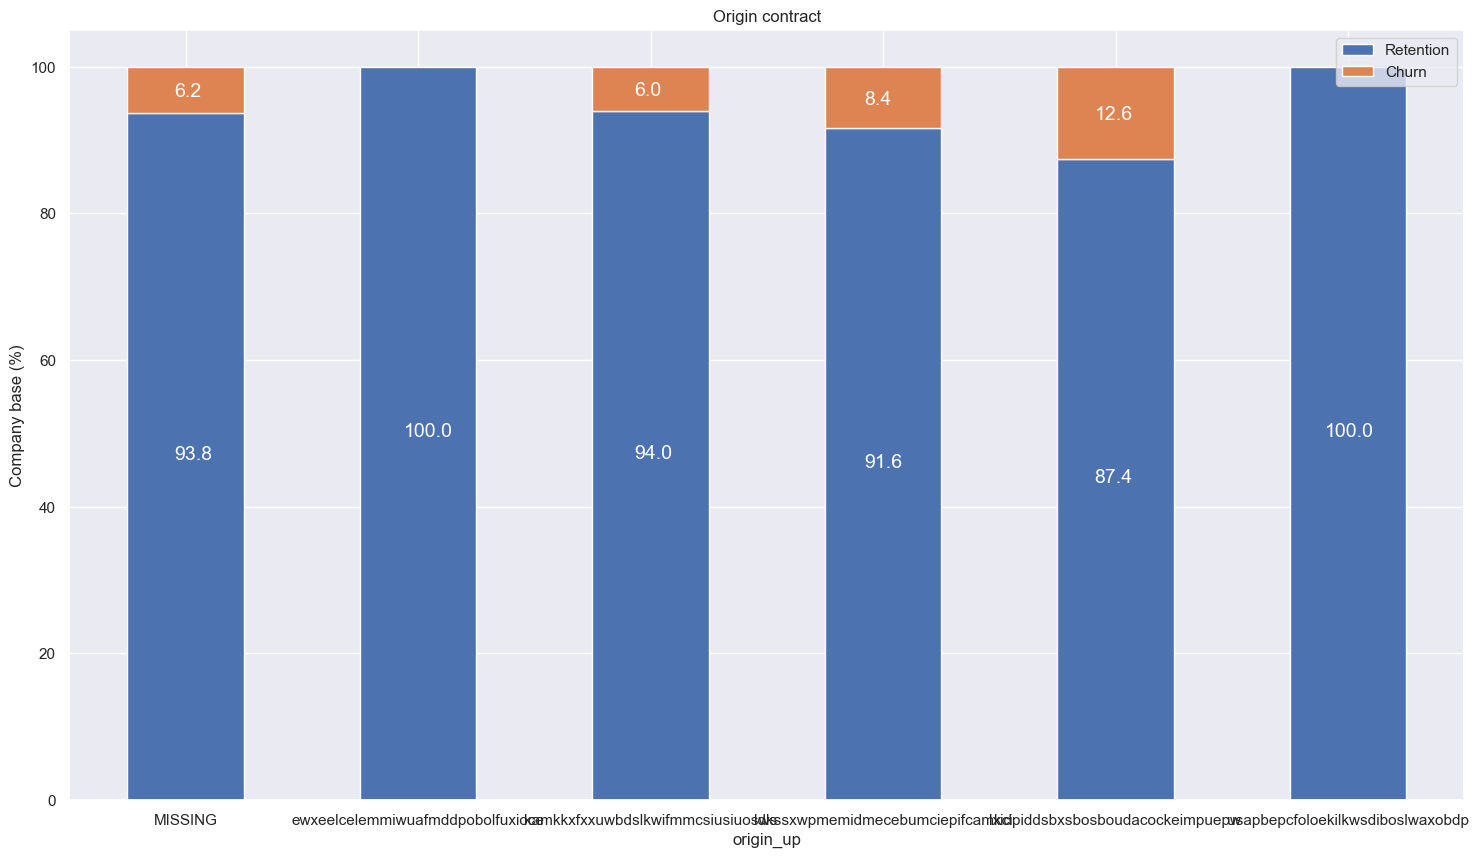

In [22]:
# origin_up
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1),axis=0)*100)
plot_stacked_bars(origin_percentage,"Origin contract")

----

## 5. Hypothesis investigation

Investigate whether price sensitivity has some influence on churn. 
Define exactly what is price sensitivity:
- Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months.

### 5.1 Unify date format & choose different time windows

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [7]:
# Transform date columns to datetime type 
# '%Y-%m-%d'

# date of activation of the contract:
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d') 
# registered date of the end of the contract:
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
# date of the last modification of the product:
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
# date of the next contract renewal:
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
# reference date:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [10]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [11]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [21]:
# groups the data by the 'id' column and calculates the mean price within each group.
# resets the index of the grouped data, adding 'id' as a column in the resulting DataFrame.
mean_year = price_df.groupby(['id']).mean(numeric_only=True).reset_index()

## 'numeric_only=True'

mean_year.head(3)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000


In [17]:
# Mean
# select the date > 2015-06-01, groups the data by the 'id' column, calculates the mean price  
mean_6m = price_df[price_df['price_date']>'2015-06-01'].groupby('id').mean(numeric_only=True).reset_index()

# select the date > 2015-10-01, groups and calculates the mean price
mean_3m = price_df[price_df['price_date']>'2015-10-01'].groupby('id').mean(numeric_only=True).reset_index()

In [18]:
mean_6m.head(3)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000


In [19]:
mean_3m.head(3)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000


### 5.2 Rename columns & merge 6m, 3m, year, churn

In [46]:
# Rename all 3 dataframes: price->mean_year_price
# for the mean_year df:
mean_year = mean_year.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_year_price_peak1_var", 
        "price_peak_var":     "mean_year_price_peak2_var", 
        "price_mid_peak_var": "mean_year_price_peak3_var", 
        "price_off_peak_fix": "mean_year_price_peak1_fix", 
        "price_peak_fix":     "mean_year_price_peak2_fix", 
        "price_mid_peak_fix": "mean_year_price_peak3_fix"          
    }
)

In [47]:
# for the mean_6m df:
mean_6m = mean_6m.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_6m_price_peak1_var",
        "price_peak_var":     "mean_6m_price_peak2_var",
        "price_mid_peak_var": "mean_6m_price_peak3_var",
        "price_off_peak_fix": "mean_6m_price_peak1_fix",
        "price_peak_fix":     "mean_6m_price_peak2_fix",
        "price_mid_peak_fix": "mean_6m_price_peak3_fix"           
    }
)

In [32]:
# for the mean_3m df:
mean_3m = mean_3m.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_3m_price_peak1_var",
        "price_peak_var":     "mean_3m_price_peak2_var",
        "price_mid_peak_var": "mean_3m_price_peak3_var",
        "price_off_peak_fix": "mean_3m_price_peak1_fix",
        "price_peak_fix":     "mean_3m_price_peak2_fix",
        "price_mid_peak_fix": "mean_3m_price_peak3_fix"           
    }
)

In [36]:
# Calculate the whole price=price for energe + price for power
# add new columns 
# for mean_year df:
mean_year ["mean_year_price_peak1"] = mean_year["mean_year_price_peak1_var"] + mean_year["mean_year_price_peak1_fix"]
mean_year ["mean_year_price_peak2"] = mean_year["mean_year_price_peak2_var"] + mean_year["mean_year_price_peak2_fix"]
mean_year ["mean_year_price_peak3"] = mean_year["mean_year_price_peak3_var"] + mean_year["mean_year_price_peak3_fix"]

mean_year.head(3) # check 3 new columns

,id,mean_year_price_peak1_var,mean_year_price_peak2_var,mean_year_price_peak3_var,mean_year_price_peak1_fix,mean_year_price_peak2_fix,mean_year_price_peak3_fix,mean_year_price_peak1,mean_year_price_peak2,mean_year_price_peak3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000


In [40]:
# for mean_6m:
mean_6m["mean_6m_price_peak1"] = mean_6m["mean_6m_price_peak1_var"] + mean_6m["mean_6m_price_peak1_fix"]
mean_6m["mean_6m_price_peak2"] = mean_6m["mean_6m_price_peak2_var"] + mean_6m["mean_6m_price_peak2_fix"]
mean_6m["mean_6m_price_peak3"] = mean_6m["mean_6m_price_peak3_var"] + mean_6m["mean_6m_price_peak3_fix"]

mean_6m.head(3) # check 3 new columns

,id,mean_6m_price_peak1_var,mean_6m_price_peak2_var,mean_6m_price_peak3_var,mean_6m_price_peak1_fix,mean_6m_price_peak2_fix,mean_6m_price_peak3_fix,mean_6m_price_peak1,mean_6m_price_peak2,mean_6m_price_peak3
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000


In [41]:
# for mean_3m:
mean_3m["mean_3m_price_peak1"] = mean_3m["mean_3m_price_peak1_var"] + mean_3m["mean_3m_price_peak1_fix"]
mean_3m["mean_3m_price_peak2"] = mean_3m["mean_3m_price_peak2_var"] + mean_3m["mean_3m_price_peak2_fix"]
mean_3m["mean_3m_price_peak3"] = mean_3m["mean_3m_price_peak3_var"] + mean_3m["mean_3m_price_peak3_fix"]

mean_3m.head(3) # check 3 new columns

,id,mean_3m_price_peak1_var,mean_3m_price_peak2_var,mean_3m_price_peak3_var,mean_3m_price_peak1_fix,mean_3m_price_peak2_fix,mean_3m_price_peak3_fix,mean_3m_price_peak1,mean_3m_price_peak2,mean_3m_price_peak3
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000


In [58]:
# Merge. 3 dfs into 1
price_feature = mean_year.merge(mean_6m,on='id').merge(mean_3m,on='id')

In [59]:
price_feature.head() # 28 columns

,id,mean_year_price_peak1_var,mean_year_price_peak2_var,mean_year_price_peak3_var,mean_year_price_peak1_fix,mean_year_price_peak2_fix,mean_year_price_peak3_fix,mean_year_price_peak1,mean_year_price_peak2,mean_year_price_peak3,...,mean_6m_price_peak3,mean_3m_price_peak1_var,mean_3m_price_peak2_var,mean_3m_price_peak3_var,mean_3m_price_peak1_fix,mean_3m_price_peak2_fix,mean_3m_price_peak3_fix,mean_3m_price_peak1,mean_3m_price_peak2,mean_3m_price_peak3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [61]:
list(price_feature.columns) # check column names

['id',
 'mean_year_price_peak1_var',
 'mean_year_price_peak2_var',
 'mean_year_price_peak3_var',
 'mean_year_price_peak1_fix',
 'mean_year_price_peak2_fix',
 'mean_year_price_peak3_fix',
 'mean_year_price_peak1',
 'mean_year_price_peak2',
 'mean_year_price_peak3',
 'mean_6m_price_peak1_var',
 'mean_6m_price_peak2_var',
 'mean_6m_price_peak3_var',
 'mean_6m_price_peak1_fix',
 'mean_6m_price_peak2_fix',
 'mean_6m_price_peak3_fix',
 'mean_6m_price_peak1',
 'mean_6m_price_peak2',
 'mean_6m_price_peak3',
 'mean_3m_price_peak1_var',
 'mean_3m_price_peak2_var',
 'mean_3m_price_peak3_var',
 'mean_3m_price_peak1_fix',
 'mean_3m_price_peak2_fix',
 'mean_3m_price_peak3_fix',
 'mean_3m_price_peak1',
 'mean_3m_price_peak2',
 'mean_3m_price_peak3']

In [62]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [66]:
# Merge the Price data with Churn data in client_df by ID. Select Churn and ID columns only.
price_analysis = price_feature.merge(client_df[["id","churn"]], on='id')
price_analysis.head() # 29 columns

,id,mean_year_price_peak1_var,mean_year_price_peak2_var,mean_year_price_peak3_var,mean_year_price_peak1_fix,mean_year_price_peak2_fix,mean_year_price_peak3_fix,mean_year_price_peak1,mean_year_price_peak2,mean_year_price_peak3,...,mean_3m_price_peak1_var,mean_3m_price_peak2_var,mean_3m_price_peak3_var,mean_3m_price_peak1_fix,mean_3m_price_peak2_fix,mean_3m_price_peak3_fix,mean_3m_price_peak1,mean_3m_price_peak2,mean_3m_price_peak3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


### 5.3 Correlation 

In [71]:
# calculate the correlation matrix for the numeric columns 
# Correlation measures the strength and direction of a linear relationship between two variables. 
# The resulting correlation matrix is a square matrix where each cell (i, j) contains the correlation coefficient between the ith and jth columns of the DataFrame. 
# The correlation coefficient ranges from -1 to 1, 
# where -1 indicates a perfect negative correlation, 
# 1 indicates a perfect positive correlation, 
# and 0 indicates no linear correlation.

corr = price_analysis.corr(numeric_only=True)

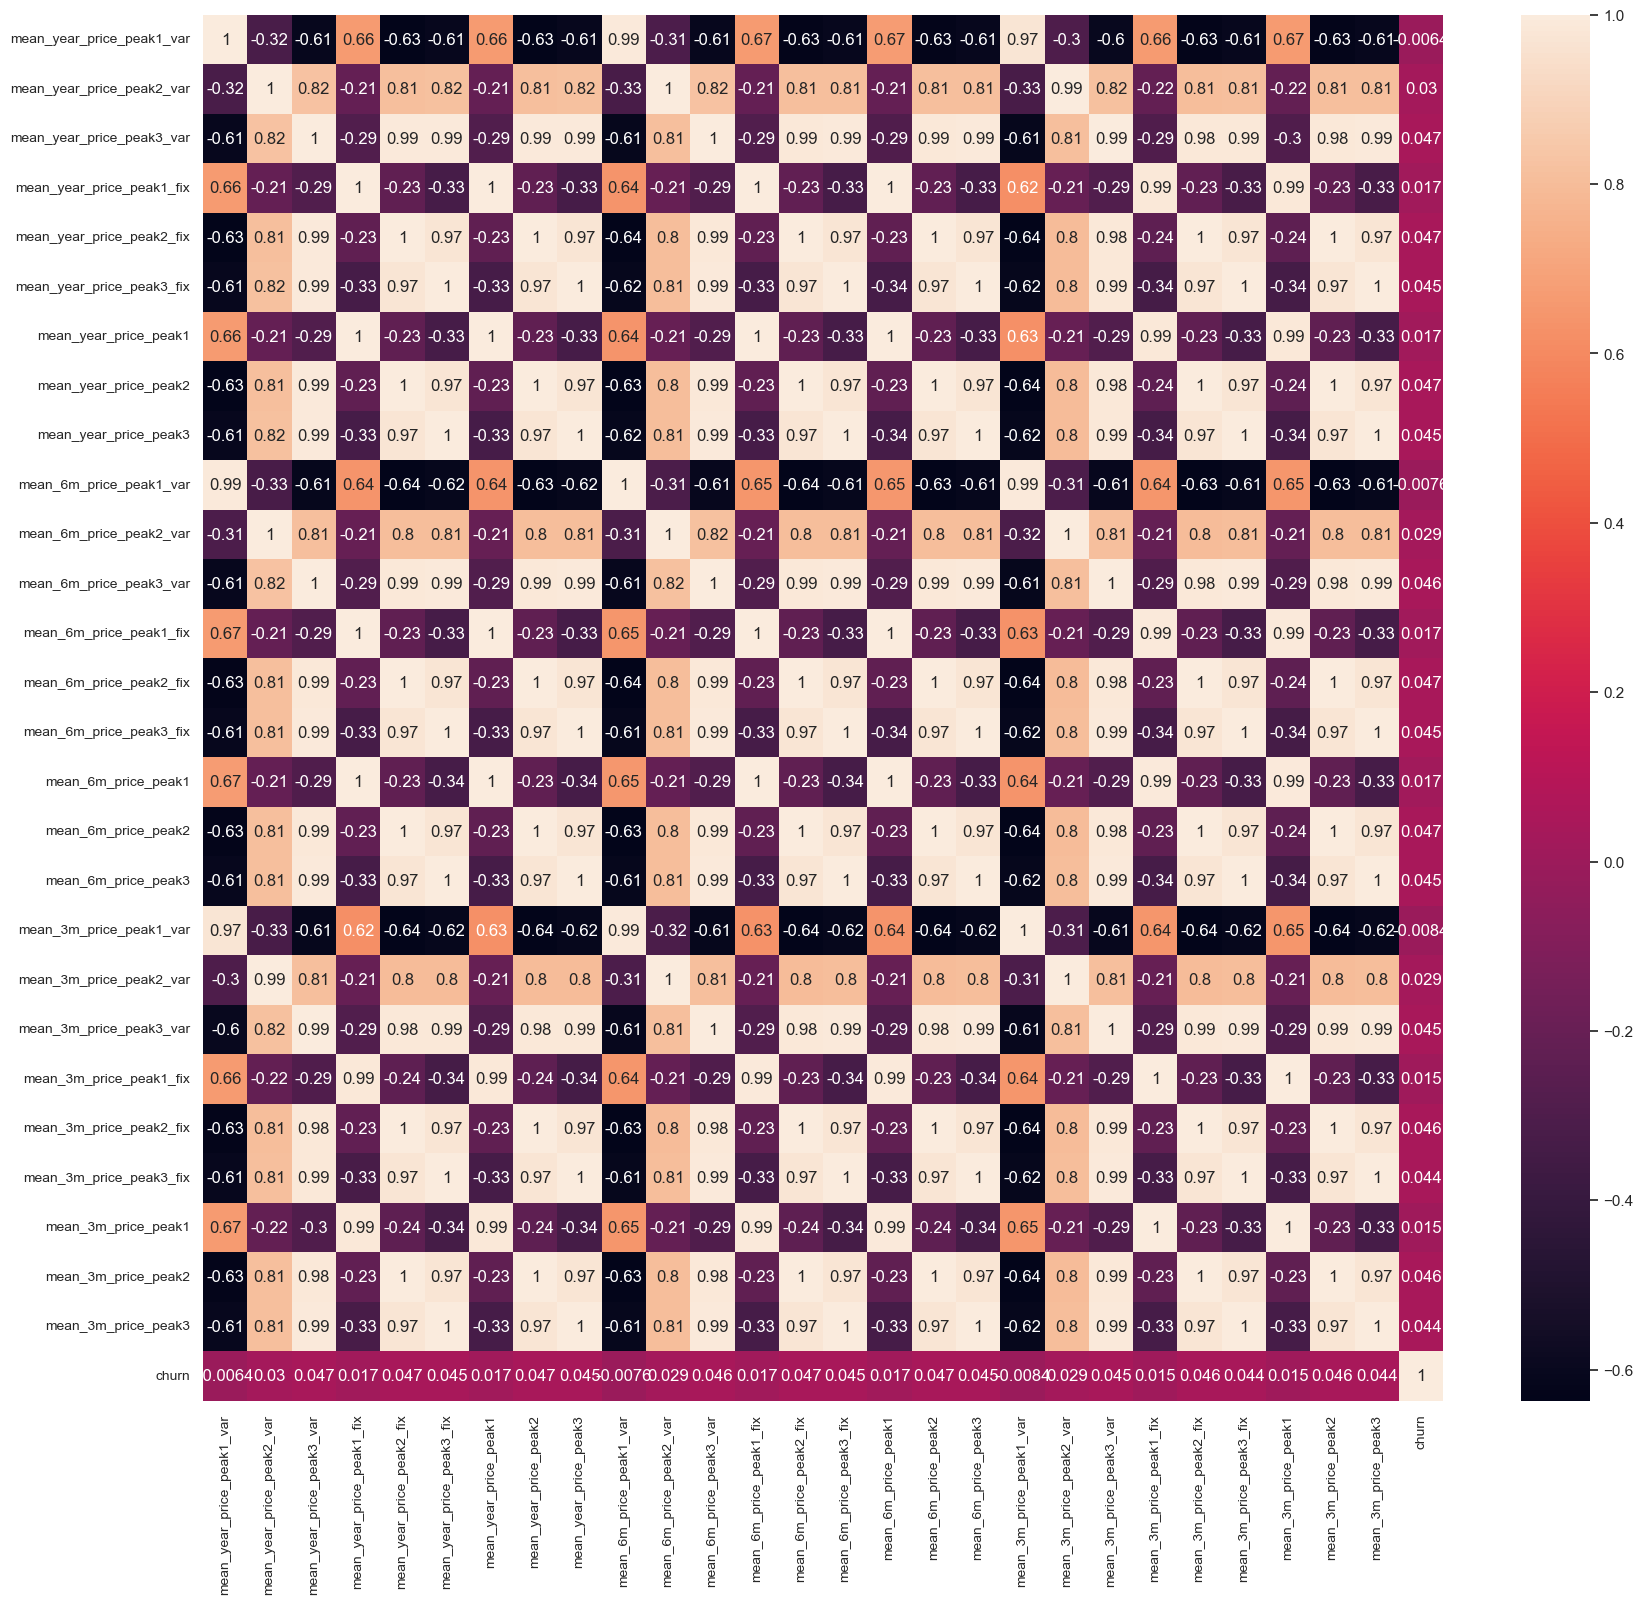

In [80]:
# Plot correlation
plt.figure(figsize=(20,18)) # create a heatmap visualization of the correlation matrix 
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, 
            annot=True,            # add annotation
            annot_kws={'size':12}) # font size

# axis ticks size
plt.xticks(fontsize=10) # font size on the x
plt.yticks(fontsize=10) # font size on the y
plt.show()

The correlation plot shows that the correlation with churn is very low. This indicates that there might be a weak linear relationship between price sensitivity and churn. 

### 5.4 Back up dataset 

In [85]:
# since the Churn column now is in the price_analysis df, 
# remove Churn from the original client_df, 
# merge client_df and price_analysis

merged_data = pd.merge(client_df.drop(columns=['churn']), # drop the column Churn
                       price_analysis, on='id')
merged_data.head() # 53 columns

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_peak1_var,mean_3m_price_peak2_var,mean_3m_price_peak3_var,mean_3m_price_peak1_fix,mean_3m_price_peak2_fix,mean_3m_price_peak3_fix,mean_3m_price_peak1,mean_3m_price_peak2,mean_3m_price_peak3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [86]:
# back up
merged_data.to_csv('clearn_data_after_eda.csv')

-----